# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [19]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

%reload_ext autoreload
%autoreload 2

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:** We see the Udacity white car not moving at all.
There are two rewards happening: positive, when the red light in front of the car is on, so 'it happens' to be doing the correct thing, which is waiting before green. And then the negatives, whish is the green light is on, and the car is not moving, when it should

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
- Environment.verbose displays additional output for the simulation. Environment.num_dummies number of dummy agents in the environment, defaults to 100. grid_size number of intersections (columns, rows) defaults to (8, 6)
- We call the method Environment.act
- render_text method is used to display information on terminal, render actually draws inside pygame the buildings,cars, etc of the simulation.
- It considers East-West first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


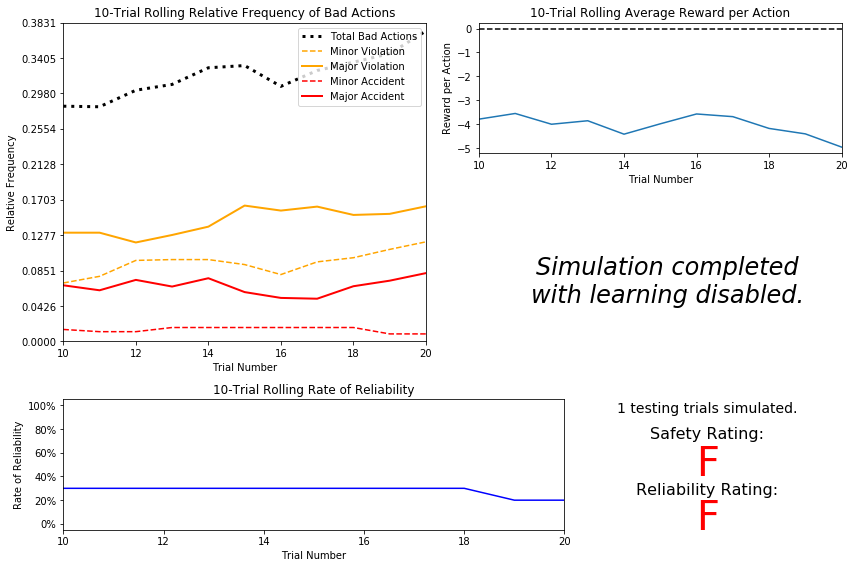

In [22]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
- About Frequency of Bad Actions: since the actions of the cab are random, what we see represented are the chances of something happening in the cab-world, variations in each of the lines are just due to chance. Interesting to note is that there are less minor accidents that Major accidents, and less minor Violations than Major. I would expect that Major is less plausible than Minor, so less frequency.
- Average Reward per Action, again, since the actions are random, we only see random rewards happening in the trials. From this we just know that a random agent is around -3.5 and -5 reward per action average.
- Rate of Reliability, again, since we are doing random actions, reliability is not going to be subjected to many changes, as we can see in the graph.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**
I think we need all 'waypoint' and 'inputs'. Waypoint is obvious we need, so the agent can take the required path towards the solution == We need to know which direction are we taking in each state.

Direction plus what the environment is telling us or 'inputs' the agent must take an action that maximizes the reward.
In inputs, the light is also obviously critical, so no violations nor accidents happen.

I would assume that "oncoming" is also important, if 'oncoming' has green light, we need to avoid possible crashes, in which the agent needs to turn left, and oncoming is turning right or 'forward', or if agent goes forward and oncoming is turning 'right', or if the agent turns right and oncoming also turns right. Not sure if the simulation takes into account these possibilites. But seems logical to include it in our first pass on the problem.

We can possibly remove 'left' and 'right' from inputs, since if the light is enough to control the action, they will not 'matter' to the cab. The assumption that an agent can turn right on red light only applies to certain states in United States, and since it complicates the state space, we can, for the moment, discard it and review later if we see it is needed to achieve better performance in reaching the destination. 

Including 'deadline' input: there are two problems with this, first is that the possible values of deadline are multiple (5*distance), so our state space can potentially explode in number of possible states, plus, it is changing per trial, which I think it can confuse the learning process. Second, if we wanted to introduce deadline in the features for the agent, what we are doing is creating pressure for the agent to take decissions when the deadline is approaching, which would in turn create potential violations and accidents. So, not including it.

In [56]:
# TODO:
"""Just note that including left traffic only results in 96 total states.
As a total of 96 total states isn't too many to learn with a feasible number of training trials and a good
epsilon decay rate. Maybe another idea to confirm this would be to run a Monte Carlo simulation
(considering that all these state are uniformly randomly seen). Would 750 be enough? 
How many training trials could represent 750 steps? What about every state, action pair?
Try changing the step
"""
from sets import Set
from random import choice

def chance_of_visiting_all_states(iterations, k, n=24):
    r = range(n)
    total = 0
    for i in range(iterations):
        s = Set()
        for j in range(k):
            s.add(choice(r))
            if len(s) == n:
                total +=1
                break
    return float(total)/iterations

steps = 750
print "Chance of visiting all states in {st} steps: {ch}".format(st = steps, ch = chance_of_visiting_all_states(2000, steps, 96))

Chance of visiting all states in 750 steps: 0.967


### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** 
- *what would be the size of the state space?* We have 3 waypoints, 2 lights, 4 for oncoming = 24 is the size of the state space.
- *Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?* Yes, given enough training trials, the agent can learn the optimal policy for each state.


### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

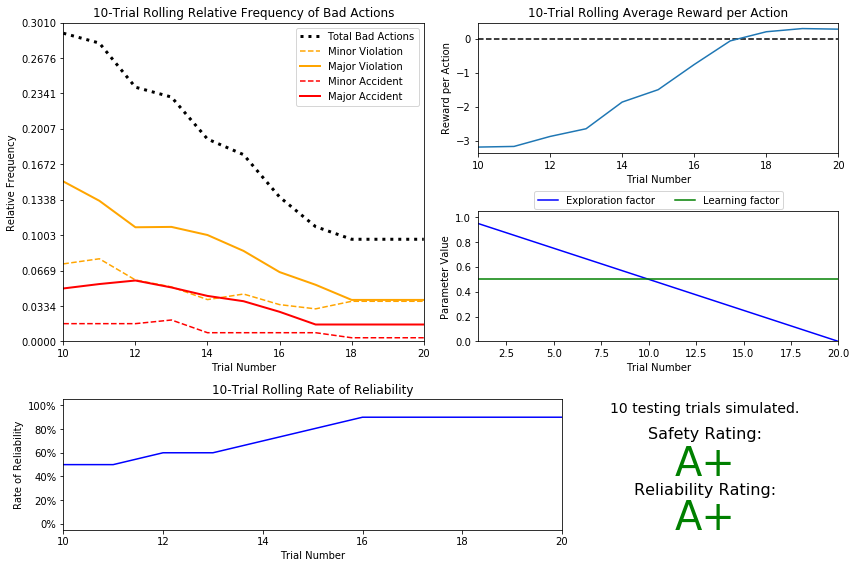

In [28]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?* Not really.
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?* Since the epsilon gets from 1 to 0 in decrements of 0.05 each trial, then we need 20 trials to enter into test trials. So 20 train trials and 1 test.
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?* Yes, "Exploration factor" goes from 1 till 0.
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?* Yes.
- *How does the safety and reliability rating compare to the initial driving agent?* A+ vs F.
- *As the number of trials increases, does the outcome of results change significantly?* No, it seems it reaches a plateau in which no further improvement is noticed.
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?* No, not enough test trials.

It's very interesting to analyce "sim_default-learning.txt". It can be seen that the agent has learnt perfectly the light 'red' vs 'green'. It has also learnt that it can turn right even if the light is red:
('right', 'red', 'forward')
 -- forward : -22.29
 -- None : 1.02
 -- right : 1.64
 -- left : -4.88
 
 Interesting also is the fact that even though the total number of bad actions is constatly decreasing, there are still low chances, but constant that major/minor accidents might still occur, not sure why yet.
 
 Also worth mentioning that the agent reaches its destination with 30/70% of the time remaining. 

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

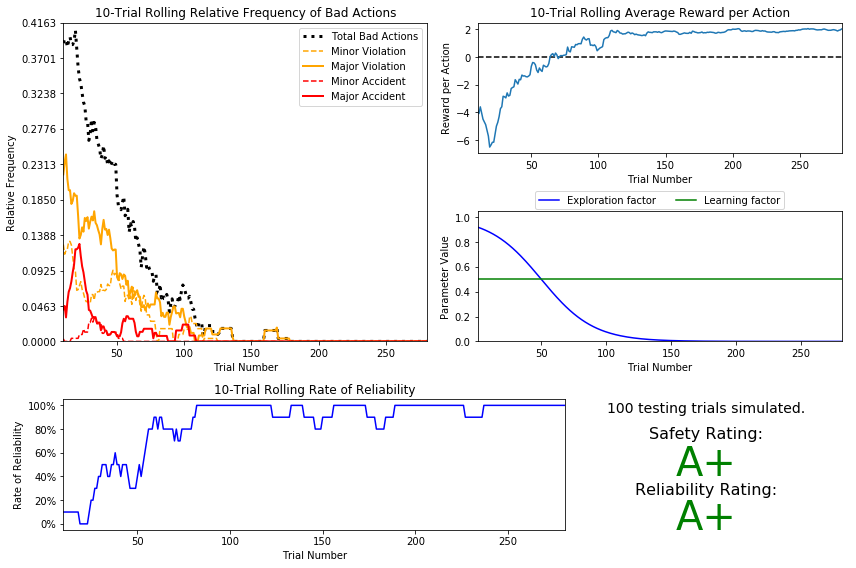

In [61]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

In [63]:
###NOTE: The above results are with "left" inmplemented as suggested by the last reviewer.

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
- *What decaying function was used for epsilon (the exploration factor)?* After trying many and several iterations, for this exploration-exploitation dilemma, I settled in the simple "epsilon -= x". I'd like to think that it strikes a good balance on start with high randomness, learn the basics, and as the training continues, it keeps learning but balanced with the already learned stuff, and finally it keeps settling learnings with less random. I've tried to 'force' this insight, with different approaches, but this one seems to work best.
- *Approximately how many training trials were needed for your agent before begining testing?* I was controlling the number, until I was satissfied with the results, above 100 trials good results started to happen, finally 1000 trials gave double A+'s. 
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?* I set tolerance to 0, so that I could control the number of trials, entering -1 for example. For alpha, I tried also different approaches, but the 0.5 seems to work fine.
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?* I think this learner is a much more robust learner, even though it is just a more 'lets do more repetitions of what we were doing before' version.
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?* Double A+'s dont lie :)
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?* I am, but there are still areas I don't fully understand of the process.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 
1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
I think I did apply part of this when I decided to use some of the features. The optimal policy would look like this:
(direction is the required direction coming from planner)
light=red, direction=any, action=wait 
(unless right turn in red light is allowed, then: light=red, direction=any(except right), action=wait(or right if direction is right and no car from left in forward and no car on left waiting))
light=right, direction=right, action=right or if car in right, forward.
light=right, direction=left, action=left or if car in left, forward.
light=right, direction=forward, action=forward or if car in forward, right.

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 
The decisions are quite straight forward: if "red": wait, if "green": take direction from planner. I think that just following these basics gives the best results in this environment.

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.
('left', 'green', 'left')
 -- forward : 0.16
 -- None : -4.90
 -- right : 1.08
 -- left : 1.90
 
('right', 'green', 'left')
 -- forward : 0.40
 -- None : -5.59
 -- right : 1.57
 -- left : 0.56
 
 As explained, the max value for each, corresponds to the direcion required.
 
 And for red:
 
 ('right', 'red', None)
 -- forward : -11.55
 -- None : 0.41
 -- right : -1.01
 -- left : -18.27
 
Then just wait.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Given that we are not allowing right turns in red light, the agent has learnt all optimal policies, for all of them the highest value is the optimal action to take given our premises.

But, inspecting what the agent has learnt, I've encountered that the simulation might allow this to happen:

('left', 'red', 'right')
 -- forward : -29.53
 -- None : 1.25
 -- right : -0.20
 -- left : -40.34

We can see that in red light, going forward or left is heavily penalized, but going right is close to "wait", we could improve the cab agent to recognize when it can turn right on red light.
The 'turn right in red light' could be introduced but this will incur in increasing the complexity of the states, by having to introduce what the left and right cars are doing.

State dict:


/-----------------------------------------
| State-action rewards from Q-Learning
\-----------------------------------------

('forward', 'green', None)
 -- forward : 1.68
 -- None : -5.22
 -- right : 0.64
 -- left : 0.76

('left', 'green', 'forward')
 -- forward : 0.68
 -- None : -5.32
 -- right : -0.08
 -- left : 2.06

('right', 'green', None)
 -- forward : 0.34
 -- None : -4.44
 -- right : 1.29
 -- left : 0.51

('right', 'green', 'right')
 -- forward : 0.30
 -- None : -4.67
 -- right : 1.96
 -- left : 1.01

('forward', 'green', 'left')
 -- forward : 1.72
 -- None : -5.54
 -- right : 0.95
 -- left : 0.70

('left', 'green', 'right')
 -- forward : 1.12
 -- None : -5.12
 -- right : 0.14
 -- left : 1.97

('right', 'red', 'forward')
 -- forward : -26.59
 -- None : 1.19
 -- right : -0.67
 -- left : -11.91

('forward', 'red', 'forward')
 -- forward : -9.88
 -- None : 1.30
 -- right : -4.87
 -- left : -10.24

('left', 'red', None)
 -- forward : -9.66
 -- None : 2.13
 -- right : -0.42
 -- left : -25.94

('forward', 'red', 'right')
 -- forward : -28.89
 -- None : 2.12
 -- right : 0.74
 -- left : -39.83

('left', 'red', 'left')
 -- forward : -10.24
 -- None : 2.17
 -- right : -9.02
 -- left : -18.20

('right', 'red', 'left')
 -- forward : -25.12
 -- None : 1.38
 -- right : -1.29
 -- left : -10.41

('right', 'red', 'right')
 -- forward : -13.05
 -- None : 0.34
 -- right : -4.06
 -- left : -39.68

('left', 'red', 'right')
 -- forward : -29.53
 -- None : 1.25
 -- right : -0.20
 -- left : -40.34

('right', 'green', 'forward')
 -- forward : 0.59
 -- None : -5.01
 -- right : 1.60
 -- left : 0.17

('forward', 'green', 'forward')
 -- forward : 1.82
 -- None : -5.16
 -- right : 0.96
 -- left : 0.92

('forward', 'red', 'left')
 -- forward : -24.63
 -- None : 1.47
 -- right : 0.40
 -- left : -9.93

('left', 'green', None)
 -- forward : 1.06
 -- None : -4.91
 -- right : 0.75
 -- left : 2.21

('forward', 'green', 'right')
 -- forward : 1.91
 -- None : -5.38
 -- right : 0.56
 -- left : 0.70

('forward', 'red', None)
 -- forward : -24.93
 -- None : 1.61
 -- right : -4.24
 -- left : -19.36

('left', 'red', 'forward')
 -- forward : -31.01
 -- None : 2.10
 -- right : 0.75
 -- left : -10.65

('right', 'red', None)
 -- forward : -11.55
 -- None : 0.41
 -- right : -1.01
 -- left : -18.27

('left', 'green', 'left')
 -- forward : 0.16
 -- None : -4.90
 -- right : 1.08
 -- left : 1.90

('right', 'green', 'left')
 -- forward : 0.40
 -- None : -5.59
 -- right : 1.57
 -- left : 0.56
 
 
 
 NOTE: after achieving good restuls with my implemetation, reviewer suggested to use "left" as feature and also new epsilon. So the last delivery is with the new results as follows:
 
 
 /-----------------------------------------
| State-action rewards from Q-Learning
\-----------------------------------------

('right', 'green', 'forward', 'right')
 -- forward : 0.00
 -- None : -2.62
 -- right : 0.00
 -- left : 0.57

('left', 'red', 'right', None)
 -- forward : -7.37
 -- None : 2.63
 -- right : 0.00
 -- left : -38.59

('left', 'green', 'forward', 'left')
 -- forward : 0.54
 -- None : 0.00
 -- right : 0.00
 -- left : 1.57

('left', 'red', 'right', 'left')
 -- forward : 0.00
 -- None : 1.17
 -- right : 0.00
 -- left : 0.00

('forward', 'green', 'forward', None)
 -- forward : 1.59
 -- None : -5.01
 -- right : 1.14
 -- left : -0.03

('right', 'green', 'right', 'forward')
 -- forward : 0.52
 -- None : 0.00
 -- right : 1.89
 -- left : 0.00

('forward', 'red', 'left', None)
 -- forward : -9.30
 -- None : 2.26
 -- right : 0.69
 -- left : -9.89

('left', 'red', 'right', 'right')
 -- forward : 0.00
 -- None : 2.32
 -- right : 0.00
 -- left : 0.00

('left', 'green', None, 'forward')
 -- forward : 0.77
 -- None : -4.89
 -- right : 1.02
 -- left : 2.65

('left', 'green', 'right', 'right')
 -- forward : 0.00
 -- None : 0.00
 -- right : 0.78
 -- left : 0.00

('right', 'red', 'left', 'right')
 -- forward : 0.00
 -- None : 0.75
 -- right : 0.00
 -- left : -4.81

('right', 'green', 'left', 'right')
 -- forward : 0.00
 -- None : 0.00
 -- right : 2.04
 -- left : 0.00

('left', 'red', None, 'right')
 -- forward : -5.11
 -- None : 0.00
 -- right : 1.07
 -- left : -7.56

('left', 'green', None, None)
 -- forward : 0.89
 -- None : -5.26
 -- right : 1.01
 -- left : 1.99

('left', 'green', None, 'left')
 -- forward : 0.13
 -- None : -4.75
 -- right : -0.03
 -- left : 1.34

('left', 'red', 'left', 'forward')
 -- forward : -34.69
 -- None : 1.81
 -- right : -10.28
 -- left : -34.88

('right', 'red', 'right', 'left')
 -- forward : 0.00
 -- None : -0.45
 -- right : 2.38
 -- left : -19.65

('forward', 'red', 'right', None)
 -- forward : -5.32
 -- None : 1.42
 -- right : -0.02
 -- left : -19.69

('left', 'green', 'left', 'forward')
 -- forward : 0.59
 -- None : -2.19
 -- right : -0.01
 -- left : 0.00

('forward', 'green', None, 'right')
 -- forward : 1.93
 -- None : 0.00
 -- right : 0.82
 -- left : 1.03

('right', 'red', 'left', 'forward')
 -- forward : -30.33
 -- None : 0.80
 -- right : 0.00
 -- left : -19.73

('forward', 'red', 'right', 'left')
 -- forward : -4.57
 -- None : 1.51
 -- right : 0.00
 -- left : 0.00

('right', 'red', 'right', 'forward')
 -- forward : 0.00
 -- None : 0.89
 -- right : 0.00
 -- left : -19.94

('left', 'green', 'left', 'left')
 -- forward : 0.63
 -- None : -2.56
 -- right : 0.00
 -- left : 1.49

('forward', 'green', 'right', 'right')
 -- forward : 1.03
 -- None : 0.00
 -- right : 0.00
 -- left : 0.00

('left', 'green', 'left', None)
 -- forward : 0.77
 -- None : -5.39
 -- right : 0.39
 -- left : 1.63

('right', 'green', 'forward', None)
 -- forward : 0.14
 -- None : -3.74
 -- right : 2.41
 -- left : 1.24

('left', 'green', 'forward', 'right')
 -- forward : 0.68
 -- None : 0.00
 -- right : 0.00
 -- left : 0.00

('left', 'green', 'left', 'right')
 -- forward : 0.00
 -- None : 0.00
 -- right : 0.33
 -- left : 2.17

('left', 'red', None, 'left')
 -- forward : -11.82
 -- None : 2.07
 -- right : 0.27
 -- left : -12.51

('forward', 'green', 'right', 'forward')
 -- forward : 1.58
 -- None : 0.00
 -- right : 0.32
 -- left : 0.00

('forward', 'green', 'left', 'left')
 -- forward : 2.30
 -- None : -4.08
 -- right : 0.00
 -- left : 0.63

('right', 'green', 'left', 'left')
 -- forward : 0.00
 -- None : 0.00
 -- right : 2.31
 -- left : 0.58

('left', 'red', 'left', 'left')
 -- forward : -8.11
 -- None : 1.52
 -- right : 0.10
 -- left : -4.70

('right', 'red', 'forward', None)
 -- forward : -9.66
 -- None : 0.56
 -- right : 1.54
 -- left : -10.16

('left', 'green', 'forward', None)
 -- forward : 0.28
 -- None : -4.29
 -- right : 0.37
 -- left : 2.38

('right', 'green', None, 'left')
 -- forward : 0.59
 -- None : -4.20
 -- right : 1.79
 -- left : 0.69

('forward', 'red', 'forward', 'forward')
 -- forward : -20.00
 -- None : 1.91
 -- right : 0.00
 -- left : -29.41

('left', 'red', 'forward', 'right')
 -- forward : -4.53
 -- None : 0.00
 -- right : 0.56
 -- left : -5.22

('right', 'red', 'left', 'left')
 -- forward : -7.92
 -- None : -0.05
 -- right : 1.66
 -- left : -9.23

('right', 'green', 'forward', 'left')
 -- forward : 0.00
 -- None : -3.83
 -- right : 2.15
 -- left : 0.00

('left', 'green', 'right', None)
 -- forward : 1.02
 -- None : -4.05
 -- right : 0.67
 -- left : 2.16

('forward', 'red', 'forward', 'left')
 -- forward : -5.44
 -- None : 1.98
 -- right : 0.14
 -- left : 0.00

('forward', 'green', 'forward', 'right')
 -- forward : 0.00
 -- None : -4.25
 -- right : 0.90
 -- left : 0.00

('right', 'green', None, 'forward')
 -- forward : 0.06
 -- None : -3.86
 -- right : 2.08
 -- left : 0.81

('forward', 'red', 'forward', None)
 -- forward : -17.97
 -- None : 1.96
 -- right : 1.13
 -- left : -9.28

('forward', 'red', None, None)
 -- forward : -9.71
 -- None : 1.93
 -- right : 1.16
 -- left : -19.67

('forward', 'green', 'left', None)
 -- forward : 1.78
 -- None : -4.99
 -- right : 0.48
 -- left : 1.04

('forward', 'red', 'right', 'forward')
 -- forward : -29.74
 -- None : 2.02
 -- right : 0.00
 -- left : 0.00

('left', 'green', None, 'right')
 -- forward : 0.34
 -- None : -3.91
 -- right : 0.00
 -- left : 1.32

('right', 'red', 'right', None)
 -- forward : -5.15
 -- None : 0.55
 -- right : 1.89
 -- left : -29.52

('forward', 'green', 'forward', 'forward')
 -- forward : 2.49
 -- None : 0.00
 -- right : 0.00
 -- left : 0.54

('forward', 'green', 'left', 'right')
 -- forward : 0.00
 -- None : 0.00
 -- right : 0.00
 -- left : 0.69

('right', 'green', 'forward', 'forward')
 -- forward : 1.25
 -- None : -4.18
 -- right : 0.00
 -- left : 0.00

('right', 'red', None, 'forward')
 -- forward : -37.81
 -- None : 0.31
 -- right : -10.30
 -- left : -29.76

('forward', 'red', 'forward', 'right')
 -- forward : -5.40
 -- None : 0.00
 -- right : 1.29
 -- left : 0.00

('forward', 'green', 'right', None)
 -- forward : 1.37
 -- None : -4.28
 -- right : 0.00
 -- left : 0.02

('forward', 'red', 'left', 'right')
 -- forward : 0.00
 -- None : 1.92
 -- right : 0.00
 -- left : -4.56

('left', 'red', None, 'forward')
 -- forward : -34.96
 -- None : 1.88
 -- right : -15.51
 -- left : 0.00

('forward', 'green', None, None)
 -- forward : 1.84
 -- None : -4.40
 -- right : 0.72
 -- left : 0.63

('right', 'green', 'right', 'left')
 -- forward : 0.00
 -- None : 0.00
 -- right : 0.00
 -- left : 0.43

('forward', 'green', None, 'left')
 -- forward : 2.27
 -- None : 0.00
 -- right : 0.48
 -- left : 1.07

('left', 'green', 'right', 'forward')
 -- forward : 0.00
 -- None : 0.00
 -- right : 0.26
 -- left : 1.70

('right', 'green', 'right', None)
 -- forward : 1.00
 -- None : -4.65
 -- right : 0.58
 -- left : -0.03

('forward', 'red', 'left', 'forward')
 -- forward : -35.44
 -- None : 1.49
 -- right : -10.28
 -- left : -20.39

('forward', 'green', None, 'forward')
 -- forward : 2.17
 -- None : -4.53
 -- right : 0.64
 -- left : 1.13

('right', 'red', None, 'right')
 -- forward : -4.61
 -- None : -0.31
 -- right : 2.12
 -- left : -7.43

('forward', 'green', 'left', 'forward')
 -- forward : 2.26
 -- None : 0.00
 -- right : 0.56
 -- left : 0.00

('right', 'red', 'forward', 'forward')
 -- forward : 0.00
 -- None : 0.62
 -- right : -9.77
 -- left : -29.85

('left', 'red', 'left', None)
 -- forward : -9.75
 -- None : 2.12
 -- right : 0.46
 -- left : -10.16

('right', 'red', 'forward', 'left')
 -- forward : 0.00
 -- None : 0.00
 -- right : 2.13
 -- left : -5.19

('right', 'green', None, None)
 -- forward : 0.88
 -- None : -5.28
 -- right : 1.80
 -- left : 0.94

('forward', 'green', 'forward', 'left')
 -- forward : 0.00
 -- None : 0.00
 -- right : 0.98
 -- left : 0.00

('right', 'green', 'left', 'forward')
 -- forward : 0.00
 -- None : -2.41
 -- right : 0.00
 -- left : 1.00

('left', 'red', 'forward', 'left')
 -- forward : -5.09
 -- None : 0.00
 -- right : 1.07
 -- left : -7.55

('forward', 'red', 'right', 'right')
 -- forward : -4.62
 -- None : 0.00
 -- right : 0.00
 -- left : 0.00

('forward', 'red', 'left', 'left')
 -- forward : -4.99
 -- None : 2.37
 -- right : 0.00
 -- left : -4.64

('right', 'red', 'left', None)
 -- forward : -10.15
 -- None : 1.08
 -- right : 1.93
 -- left : -10.15

('left', 'red', 'right', 'forward')
 -- forward : -20.15
 -- None : 1.12
 -- right : 0.00
 -- left : 0.00

('left', 'red', 'forward', None)
 -- forward : -5.30
 -- None : 2.62
 -- right : 1.20
 -- left : -8.94

('left', 'green', 'right', 'left')
 -- forward : 1.37
 -- None : -2.82
 -- right : 0.00
 -- left : 0.00

('right', 'green', None, 'right')
 -- forward : 0.96
 -- None : 0.00
 -- right : 0.00
 -- left : 0.00

('left', 'red', 'left', 'right')
 -- forward : -5.46
 -- None : 1.62
 -- right : -0.03
 -- left : -4.90

('left', 'red', 'forward', 'forward')
 -- forward : -19.81
 -- None : 2.19
 -- right : -14.81
 -- left : 0.00

('forward', 'red', None, 'left')
 -- forward : -9.22
 -- None : 1.92
 -- right : 0.86
 -- left : -9.77

('right', 'red', None, 'left')
 -- forward : -4.93
 -- None : 0.27
 -- right : 1.82
 -- left : -9.07

('forward', 'red', None, 'right')
 -- forward : -4.57
 -- None : 1.77
 -- right : 0.59
 -- left : -4.88

('right', 'red', None, None)
 -- forward : -9.70
 -- None : 0.61
 -- right : 1.78
 -- left : -9.71

('left', 'red', None, None)
 -- forward : -12.11
 -- None : 2.29
 -- right : 0.15
 -- left : -9.22

('forward', 'green', 'right', 'left')
 -- forward : 0.00
 -- None : 0.00
 -- right : 0.77
 -- left : 0.33

('right', 'red', 'forward', 'right')
 -- forward : -4.99
 -- None : 0.00
 -- right : 2.15
 -- left : -5.19

('left', 'green', 'forward', 'forward')
 -- forward : 0.38
 -- None : -3.68
 -- right : 0.00
 -- left : 1.96

('right', 'red', 'right', 'right')
 -- forward : 0.00
 -- None : 0.00
 -- right : 0.00
 -- left : 0.00

('forward', 'red', None, 'forward')
 -- forward : -38.25
 -- None : 1.80
 -- right : -14.58
 -- left : -30.53

('right', 'green', 'left', None)
 -- forward : 0.37
 -- None : -5.03
 -- right : 2.34
 -- left : 1.10
 
 
 
 ----
 The really interesting part of this, is that the agent has learnt to turn right in the right conditions, i.e.: oncoming  is going forward and left is turning right, then we're OK to turn right. (this is just one of the good examples of this).
 
 ('right', 'red', 'forward', 'right')
 -- forward : -4.99
 -- None : 0.00
 -- right : 2.15
 -- left : -5.19
 
 

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**
When I was implementing the Q-Learning algorithm I was actually thinking about this. The problem that I see is that since we have other agents operating and taking random actions, plus if we assume that lights all have different red/green periods of time not known in advance; we cannot 'foresee' what would be the reward of the future actions, unless we introduce probabilities in them, but I suppose it complicates things too much.

On regards of random start and end points, this does not affect the learning from future, since once we are in each trial, the future inspection is contained in the actual state of the trial, that is, the end point is already set and not mutable.
"You actually have this switched. As the destination actually DOES move after every trial. If we attempted to propagate reward away from the goal, we would eventually propagate reward away from every intersection."
(I just changed 'once we are in the simulation" for "once we are in each trial", which is what I wanted to convey :)

On the other hand, I cannot think on a valid characteristic intrinsic to the cab that prevents us from using gamma here. If the environment was empty of other agents, and no lights, the cab can actually foresee the reward of each of its future actions, probably related to the best direction.

"To identify the characteristic that has to do with the smartcab, try answering the following questions:
What kind of information does the smartcab receive from the environment? Does it receive "global" information, such as its position relative to the destination? Or merely "local" information such as the status of the intersection it's in?"

Thanks for that, but I still think I have a valid point here.
The agent only receives information local to the position that it is in, but again, it is a limitation the environment, by not being deterministic, not a limitation intrinsic to the agent. The agent could potentially look ahead on an action and try to ask the environment about that 'local' information for the next intersection. So I still challenge that it is a limitation of the agent itself, but a limitation of the environment.
Think of it this way, if all other cars were deterministic, and lights were also deterministic, would the agent have the limitation to look ahead into future states? 

A: "This is due to egocentric nature of the agent, as well as the random aspects of state that cannot be predicted ahead of time. Were the simulation changed to an allocentric view, where the agent could sense where it was in relation to the destination, etc, then gamma term would be a more important parameter for optimal performance and policy generation.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.